In [ ]:
from sklearn.datasets import load_wine
import pandas as pd
wine = load_wine()
df = pd.DataFrame(wine["data"], columns = wine['feature_names'])
df["answer"] = wine["target"]  #我怎知道他怎麼給出答案的？
df.to_csv("wine.csv", encoding="utf-8", index=False)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,answer
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [2]:
# step1. 準備兩份資料
from sklearn.model_selection import train_test_split
#[80%題目 80%題目 20%答案 20%答案]
x_train, x_test, y_train, y_test = train_test_split(wine["data"], 
                                                    wine["target"], 
                                                    test_size=0.2)

In [3]:
# step2.  準備方法
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2)

In [4]:
# step3. 做考古題(fit)
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [5]:
#step4. 答題(predict)
pre = clf.predict(x_test)
pre

array([1, 2, 0, 2, 0, 1, 0, 1, 0, 1, 1, 2, 1, 0, 2, 0, 2, 1, 1, 2, 2, 2,
       0, 2, 0, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2])

In [6]:
# step5. 驗證模型(accuracy)
from sklearn.metrics import accuracy_score
accuracy_score(pre, y_test)

0.8611111111111112

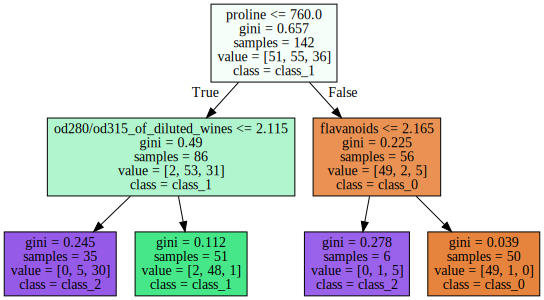

In [7]:
from sklearn.tree import export_graphviz
import graphviz
g = export_graphviz(clf, 
                    feature_names=wine["feature_names"],
                   class_names=wine["target_names"],
                   filled=True)
graphviz.Source(g)